## Project - 𝑘 -Nearest-Neighbors Classifier
## Predicting whether it will rain tomorrow or not given recorded weather conditions


### Create a 𝑘 -Nearest-Neighbors Classifier supporting 3 dimensions or more

#### Investigate whether it performs better

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#Read the data
data = pd.read_csv("C:/Users/HP/Desktop/DATA SCIENCE/Python/Learn Python With Rune/Machine Learning With Python/MachineLearningWithPython-main/files/weather.csv", parse_dates=True, index_col=0)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [3]:
#Investigate column data types and choose columns with 'float64' data type
#These will be the variables used to predict rainfall
column_dt = pd.DataFrame(data.dtypes, columns = ["DataTypes"]) ; column_dt
columns_f64 = column_dt[column_dt["DataTypes"] == "float64"].index.values.tolist()
columns_f64

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

In [4]:
#Choose 3 columns to create datasets
datasets = data[["Humidity3pm", "Pressure3pm", "MaxTemp", "RainTomorrow"]]
datasets.head()

,Humidity3pm,Pressure3pm,MaxTemp,RainTomorrow
Date,,,,
2008-02-01,84.0,1017.4,22.4,Yes
2008-02-02,73.0,1016.4,25.6,Yes
2008-02-03,86.0,1015.6,24.5,Yes
2008-02-04,90.0,1011.8,22.8,Yes
2008-02-05,74.0,1004.8,25.7,Yes


In [5]:
#Deal with remaining missing data

datasets.isnull().sum() #find number of missing values per column
datasets = datasets.dropna()

In [6]:
#Create training and test datasets

x = datasets[["Humidity3pm", "Pressure3pm", "MaxTemp"]]
y = datasets["RainTomorrow"]

y = np.array([1 if value == "Yes" else 0 for value in y])

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [7]:
#Train and Test the model
#find the accuracy score for different values of k
accuracy = []
for k in range(1, 11):
    k_neigh = KNeighborsClassifier(n_neighbors=k)
    k_neigh.fit(x_train, y_train)
    y_pred = k_neigh.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    accuracy.append(score)
    
accuracy

[0.7436517533252721,
 0.7980652962515115,
 0.7944377267230955,
 0.8137847642079806,
 0.8089480048367593,
 0.814993954050786,
 0.8137847642079806,
 0.8210399032648126,
 0.814993954050786,
 0.8125755743651754]

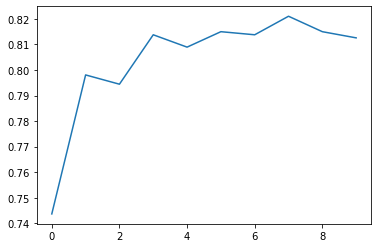

In [8]:
#I can visualize the score
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

ax.plot(accuracy)

#### It is evident that the accuracy score is around 80%. The prediction is good but I can't say it's accurate.

### What if I include more variables in predicting whether it will rain

In [9]:
#Prepare and clean the data

#add 'RainTomorrow' column to list of columns with 'float64' before subsetting
columns_f64.append("RainTomorrow")

#subset original dataset to columns with 'float64' data types + 'RainTomorrow' column
datasets = data[columns_f64]
datasets.head()

#check number of missing values
datasets.isnull().sum()

#drop 'WindGustSpeed' column because it has so many missing values
datasets.drop("WindGustSpeed", axis=1, inplace = True)

#remove other missing values
datasets_clean = datasets.dropna()
datasets_clean.head()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,17.0,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,77.4,Yes
2008-02-06,20.2,27.2,1.6,2.6,8.6,9.0,22.0,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,6.2,Yes


In [10]:
#create testing and training datasets

#remove 'WindGustSpeed' and RainTomorrow' from list of the other variables
columns_f64.remove("RainTomorrow")
columns_f64.remove("WindGustSpeed")

#split data
x = datasets_clean[columns_f64]
y = datasets_clean["RainTomorrow"]

y = np.array([1 if value == "Yes" else 0 for value in y])

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [11]:
#train and test model
k_neigh = KNeighborsClassifier()
k_neigh.fit(x_train, y_train)
y_pred = k_neigh.predict(x_test)
accuracy_score(y_test, y_pred)

0.8729198184568835

#### I can see that using more data in the prediction increases the accuracy of the prediction.